# Data Analysis and Machine Learning with Redfin Data

In [1]:
# import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

import plotly.express as px

In [3]:
df = pd.read_csv('cleaned_redfin_data-1.csv')
df.head()

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE,WALKSCORE,TRANSITSCORE,BIKESCORE
0,MLS Listing,NaN,Single Family Residential,72 Oak Grove Dr,Novato,CA,94949,1750000,5.0,3.5,...,https://www.redfin.com/CA/Novato/72-Oak-Grove-...,BAREIS,323912773,N,Y,38.069654,-122.548389,49.0,37.0,56.0
1,MLS Listing,NaN,Single Family Residential,3 Laconheath Ave,Novato,CA,94949,1299000,4.0,3.5,...,https://www.redfin.com/CA/Novato/3-Laconheath-...,BAREIS,323909714,N,Y,38.057893,-122.516246,39.0,34.0,40.0
2,MLS Listing,NaN,Single Family Residential,590 Thyme Pl,San Rafael,CA,94903,1199000,3.0,3.0,...,https://www.redfin.com/CA/San-Rafael/590-Thyme...,BAREIS,323916951,N,Y,38.011681,-122.559410,70.0,29.0,46.0
3,MLS Listing,NaN,Townhouse,464 Bahia Way,San Rafael,CA,94901,575000,3.0,1.5,...,https://www.redfin.com/CA/San-Rafael/464-Bahia...,BAREIS,323913724,N,Y,37.963937,-122.500118,75.0,42.0,64.0
4,MLS Listing,NaN,Vacant Land,0 Coleman Dr,San Rafael,CA,94901,165000,NaN,NaN,...,https://www.redfin.com/CA/San-Rafael/0-Coleman...,BAREIS,323917200,N,Y,37.980387,-122.524176,58.0,50.0,54.0


In [4]:
# shape of df
df.shape

(562, 30)

#### Data Cleaning

In [5]:
# view available columns
list(df.columns)

['SALE TYPE',
 'SOLD DATE',
 'PROPERTY TYPE',
 'ADDRESS',
 'CITY',
 'STATE OR PROVINCE',
 'ZIP OR POSTAL CODE',
 'PRICE',
 'BEDS',
 'BATHS',
 'LOCATION',
 'SQUARE FEET',
 'LOT SIZE',
 'YEAR BUILT',
 'DAYS ON MARKET',
 '$/SQUARE FEET',
 'HOA/MONTH',
 'STATUS',
 'NEXT OPEN HOUSE START TIME',
 'NEXT OPEN HOUSE END TIME',
 'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
 'SOURCE',
 'MLS#',
 'FAVORITE',
 'INTERESTED',
 'LATITUDE',
 'LONGITUDE',
 'WALKSCORE',
 'TRANSITSCORE',
 'BIKESCORE']

In [6]:
df.nunique()

SALE TYPE                                                                                        2
SOLD DATE                                                                                        0
PROPERTY TYPE                                                                                    7
ADDRESS                                                                                        559
CITY                                                                                            17
STATE OR PROVINCE                                                                                1
ZIP OR POSTAL CODE                                                                              56
PRICE                                                                                          372
BEDS                                                                                            10
BATHS                                                                                           12
LOCATION  

In [7]:
# drop unnecessary columns
df = df.drop([
    'SOLD DATE', 
    'ADDRESS',
    'CITY',
    'STATE OR PROVINCE',
    'ZIP OR POSTAL CODE',
    '$/SQUARE FEET',
    'HOA/MONTH',
    'STATUS',
    'NEXT OPEN HOUSE START TIME',
    'NEXT OPEN HOUSE END TIME',
    'URL (SEE https://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)',
    'SOURCE',
    'MLS#',
    'FAVORITE',
    'INTERESTED',
    'LATITUDE',
    'LONGITUDE',
    ], axis=1)

list(df.columns)

['SALE TYPE',
 'PROPERTY TYPE',
 'PRICE',
 'BEDS',
 'BATHS',
 'LOCATION',
 'SQUARE FEET',
 'LOT SIZE',
 'YEAR BUILT',
 'DAYS ON MARKET',
 'WALKSCORE',
 'TRANSITSCORE',
 'BIKESCORE']

In [8]:
# preview dataset
df.head()

,SALE TYPE,PROPERTY TYPE,PRICE,BEDS,BATHS,LOCATION,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,WALKSCORE,TRANSITSCORE,BIKESCORE
0,MLS Listing,Single Family Residential,1750000,5.0,3.5,Novato,2934.0,5456.0,2004.0,12,49.0,37.0,56.0
1,MLS Listing,Single Family Residential,1299000,4.0,3.5,Novato,2126.0,4125.0,1998.0,29,39.0,34.0,40.0
2,MLS Listing,Single Family Residential,1199000,3.0,3.0,San Rafael,1977.0,7209.0,1958.0,1,70.0,29.0,46.0
3,MLS Listing,Townhouse,575000,3.0,1.5,San Rafael,1323.0,3598.0,1973.0,1,75.0,42.0,64.0
4,MLS Listing,Vacant Land,165000,NaN,NaN,San Rafael,NaN,8112.0,NaN,1,58.0,50.0,54.0


In [9]:
df.isnull().sum()

SALE TYPE          0
PROPERTY TYPE      0
PRICE              0
BEDS              14
BATHS             16
LOCATION          17
SQUARE FEET       13
LOT SIZE          95
YEAR BUILT        24
DAYS ON MARKET     0
WALKSCORE          0
TRANSITSCORE       0
BIKESCORE          0
dtype: int64

In [10]:
# drop null values
df.dropna(inplace=True)

# preview dataset
df.shape

(434, 13)

In [11]:
df.dtypes

SALE TYPE          object
PROPERTY TYPE      object
PRICE               int64
BEDS              float64
BATHS             float64
LOCATION           object
SQUARE FEET       float64
LOT SIZE          float64
YEAR BUILT        float64
DAYS ON MARKET      int64
WALKSCORE         float64
TRANSITSCORE      float64
BIKESCORE         float64
dtype: object

In [12]:
# Convert 'BEDS' and 'BATHS' columns to int
df['BEDS'] = df['BEDS'].astype(int)
df['BATHS'] = df['BATHS'].astype(int)
df['WALKSCORE'] = df['WALKSCORE'].astype(int)
df['TRANSITSCORE'] = df['TRANSITSCORE'].astype(int)
df['BIKESCORE'] = df['BIKESCORE'].astype(int)
df['LOT SIZE'] = df['LOT SIZE'].astype(int)
df['YEAR BUILT'] = df['YEAR BUILT'].astype(int)
df['SQUARE FEET'] = df['SQUARE FEET'].astype(int)

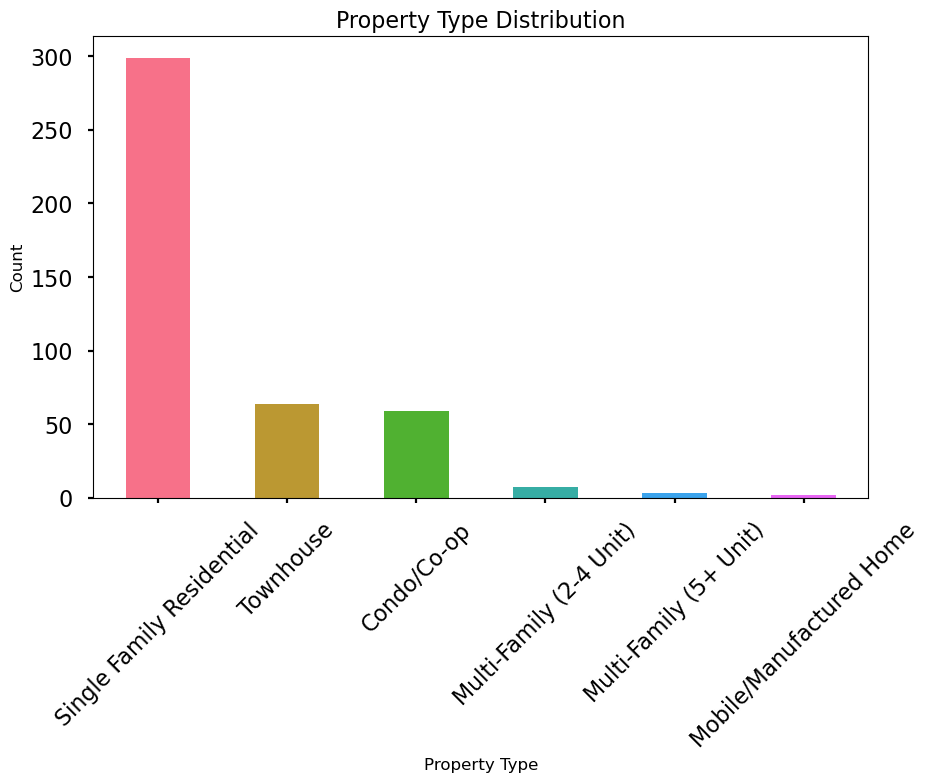

In [93]:
# Create a custom color palette (you can change the colors as desired)
custom_palette = sns.color_palette("husl")

# Create a bar plot for the 'PROPERTY TYPE' column
plt.figure(figsize=(10, 6))
property_counts = df['PROPERTY TYPE'].value_counts()
property_counts.plot(kind='bar', color=custom_palette)

# Customize the bar plot with labels and styling
plt.title('Property Type Distribution', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the bar plot
plt.show()


In [15]:
df[["PROPERTY TYPE"]].value_counts()

PROPERTY TYPE            
Single Family Residential    299
Townhouse                     64
Condo/Co-op                   59
Multi-Family (2-4 Unit)        7
Multi-Family (5+ Unit)         3
Mobile/Manufactured Home       2
dtype: int64

In [86]:
# Splitting the dataset based on the PROPERTY TYPE
SingleFamilyResidential = df[df["PROPERTY TYPE"] == "Single Family Residential"]
Condo = df[df["PROPERTY TYPE"] == "Condo"]
Townhouse = df[df["PROPERTY TYPE"] == "Townhouse"]
MultiFamily = df[df["PROPERTY TYPE"] == "Multi Family"]
ManufacturedHome = df[df["PROPERTY TYPE"] == "Manufactured"]

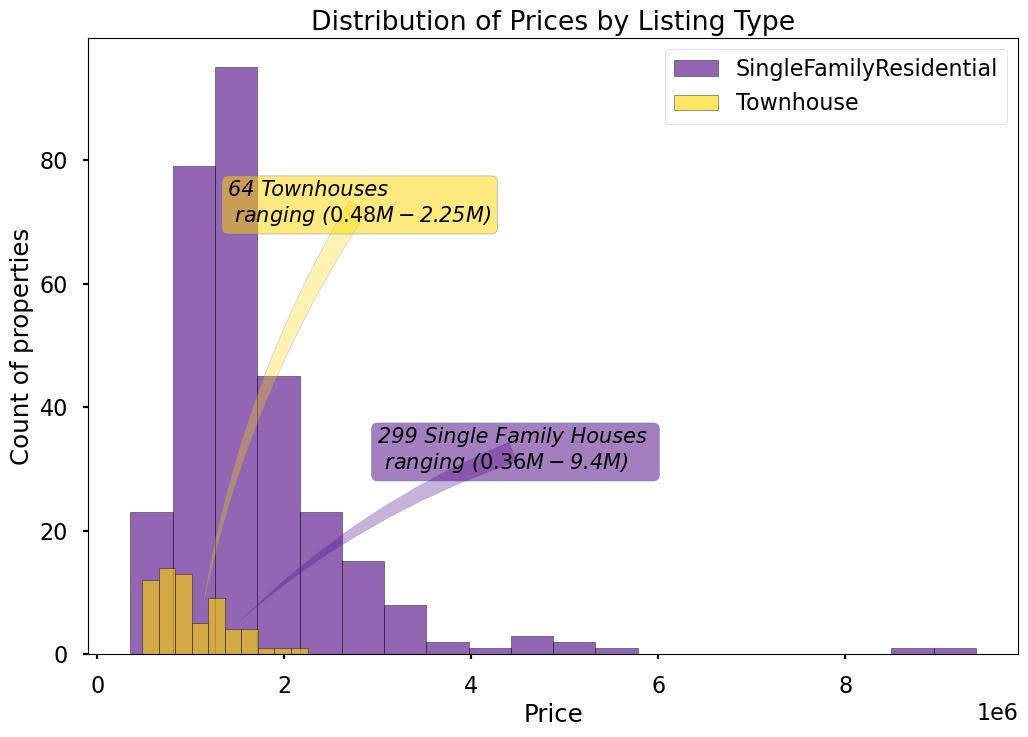

In [92]:
import matplotlib.pyplot as plt

# Extracting minimum and maximum prices for annotations
SingleFamilyResidential_min_price = round(SingleFamilyResidential["PRICE"].min() / 1e6, 2)
SingleFamilyResidential_max_price = round(SingleFamilyResidential["PRICE"].max() / 1e6, 2)
Townhouse_min_price = round(Townhouse["PRICE"].min() / 1e6, 2)
Townhouse_max_price = round(Townhouse["PRICE"].max() / 1e6, 2)
MultiFamily_min_price = round(MultiFamily["PRICE"].min() / 1e6, 2)
MultiFamily_max_price = round(MultiFamily["PRICE"].max() / 1e6, 2)
ManufacturedHome_min_price = round(ManufacturedHome["PRICE"].min() / 1e6, 2)
ManufacturedHome_max_price = round(ManufacturedHome["PRICE"].max() / 1e6, 2)
Condo_min_price = round(Condo["PRICE"].min() / 1e6, 2)
Condo_max_price = round(Condo["PRICE"].max() / 1e6, 2)

plt.style.use("seaborn-poster") 
plt.figure(figsize=(12, 8))

plt.ylabel("Count of properties")

# Houses
plt.hist(SingleFamilyResidential["PRICE"], bins=20, edgecolor="black", alpha=0.6,
         color="indigo", label="SingleFamilyResidential")

plt.annotate(text=f"{SingleFamilyResidential.shape[0]} Single Family Houses \n ranging (${SingleFamilyResidential_min_price}M - ${SingleFamilyResidential_max_price}M)",
             xy=(1500000, 5),
             xytext=(3000000, 30),
             fontsize=15,
             style='italic',
             bbox=dict(boxstyle="round", fc="indigo", alpha=0.5, ec="royalblue"),
             arrowprops=dict(arrowstyle="wedge,tail_width=1.", fc="indigo", alpha=0.3, ec="royalblue", patchA=None, connectionstyle="arc3,rad=0.1"))

# Townhouses
plt.hist(Townhouse["PRICE"], bins=10, edgecolor="black", alpha=0.6,
         color="gold", label="Townhouse")

plt.annotate(text=f"{Townhouse.shape[0]} Townhouses \n ranging (${Townhouse_min_price}M - ${Townhouse_max_price}M)",
             xy=(1100000, 5),
             xytext=(1400000, 70),
             fontsize=15,
             style='italic',
             bbox=dict(boxstyle="round", fc="gold", alpha=0.5, ec="royalblue"),
             arrowprops=dict(arrowstyle="wedge,tail_width=1.", fc="gold", alpha=0.3, ec="royalblue", patchA=None, connectionstyle="arc3,rad=0.1"))

plt.title("Distribution of Prices by Listing Type")
plt.xlabel("Price")
plt.legend()
plt.show()



In [32]:
# Define important variables required for analysis

mean_sqft = df["SQUARE FEET"].mean()
mean_price = df["PRICE"].mean()

min_sqft = df["SQUARE FEET"].min()
min_price = df["PRICE"].min()

max_sqft = df["SQUARE FEET"].max()
max_price = df["PRICE"].max()

max_sqft_loc = df.loc[[df[["SQUARE FEET"]].idxmax()[0]]]
max_price_loc = df.loc[[df[["PRICE"]].idxmax()[0]]]

min_sqft_loc = df.loc[[df[["SQUARE FEET"]].idxmin()[0]]]
min_price_loc = df.loc[[df[["PRICE"]].idxmin()[0]]]

price_at_max_sqft = max_sqft_loc["PRICE"].iloc[0]
sqft_at_max_price = max_price_loc["SQUARE FEET"].iloc[0]

price_at_min_sqft = min_sqft_loc["PRICE"].iloc[0]
sqft_at_min_price = min_price_loc["SQUARE FEET"].iloc[0]

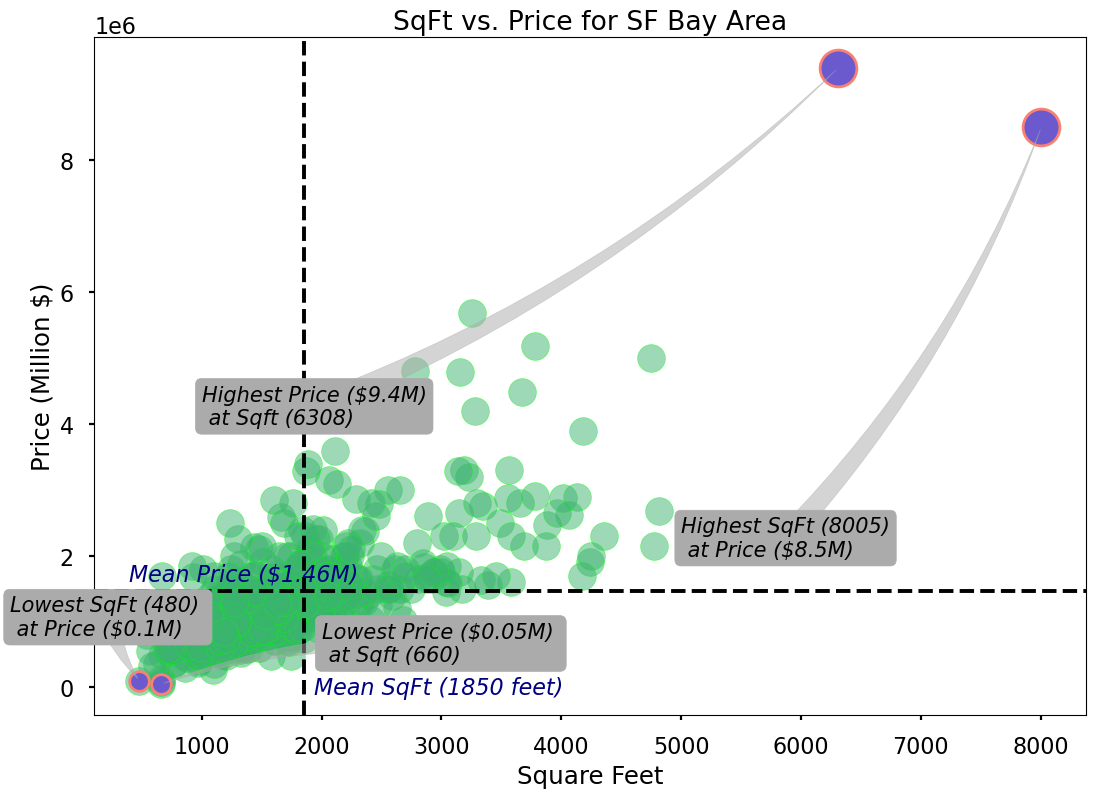

In [34]:

plt.style.use("seaborn-poster")
plt.scatter(df["SQUARE FEET"],
            df["PRICE"],
            color = "mediumseagreen",
            edgecolor = "lime",
            s = 400, alpha = 0.5) # s for size of datapoints

plt.scatter(max_sqft_loc["SQUARE FEET"],
            max_sqft_loc["PRICE"],
            color = "slateblue",
            s = 700,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.scatter(max_price_loc["SQUARE FEET"],
            max_price_loc["PRICE"],
            color = "slateblue",
            s = 700,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.scatter(min_sqft_loc["SQUARE FEET"],
            min_sqft_loc["PRICE"],
            color = "slateblue",
            s = 200,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.scatter(min_price_loc["SQUARE FEET"],
            min_price_loc["PRICE"],
            color = "slateblue",
            s = 200,
            alpha = 1.0,
            edgecolor = "salmon",
            linewidth = 2) 

plt.title("SqFt vs. Price for SF Bay Area")
plt.xlabel("Square Feet")
plt.ylabel("Price (Million $)")
plt.axvline(x = mean_sqft,
           color = "black",
           linestyle = "--")
plt.axhline(y = mean_price,
           color = "black",
           linestyle = "--")


plt.annotate(text = f"Mean SqFt ({round(mean_sqft)} feet)",
             xy = (mean_sqft, min_price),
             xytext = (10, -10),
             style = 'italic',
             textcoords = "offset pixels", # offsets texts
             fontsize = 16,
             color = "navy")

plt.annotate(text = f"Mean Price (${round(mean_price/1000000, 2)}M)",
             xy = (min_sqft, mean_price),
             xytext = (-10, 10),
             style = 'italic',
             textcoords = "offset pixels", # offsets texts
             fontsize = 16,
             color = "navy")

plt.annotate(text = f"Highest SqFt ({round(max_sqft)})\n at Price (${round(price_at_max_sqft/1000000, 2)}M)",
             xy = (max_sqft_loc["SQUARE FEET"], max_sqft_loc["PRICE"]),
             xytext = (5000, 2000000),
             style = 'italic',
             fontsize = 15,
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "#ABABAB", # fill color
                         ec = "#ABABAB"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "#ABABAB",
                               ec = "#ABABAB",
                               patchA = None, #  arrow right up against the box without any box
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" )) # dictating the shape and the curve of the connector arrow


plt.annotate(text = f"Highest Price (${round(max_price/1000000, 2)}M)\n at Sqft ({round(sqft_at_max_price)})",
             xy = (max_price_loc["SQUARE FEET"], max_price_loc["PRICE"]),
             xytext = (1000, 4000000),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "#ABABAB", # fill color
                         ec = "#ABABAB"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "#ABABAB",
                               ec = "#ABABAB",
                               patchA = None, # arrow right up against the box without any box
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" )) # dictating the shape and the curve of the connector arrow



plt.annotate(text = f"Lowest SqFt ({round(min_sqft)}) \n at Price (${round(price_at_min_sqft/1000000, 2)}M)",
             xy = (min_sqft_loc["SQUARE FEET"], min_sqft_loc["PRICE"]),
             xytext = (-600, 800000),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "#ABABAB", # fill color
                         ec = "#ABABAB"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "#ABABAB",
                               ec = "#ABABAB",
                               patchA = None, # arrow right up against the box without any box,
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" )) # dictating the shape and the curve of the connector arrow


plt.annotate(text = f"Lowest Price (${round(min_price/1000000, 2)}M) \n at Sqft ({round(sqft_at_min_price)})",
             xy = (min_price_loc["SQUARE FEET"], min_price_loc["PRICE"]),
             xytext = (2000, 400000),
             fontsize = 15,
             style = 'italic',
             bbox = dict(boxstyle = "round", # bounding box
                         fc = "#ABABAB", # fill color
                         ec = "#ABABAB"), # edge color
             arrowprops = dict(arrowstyle = "wedge,tail_width=1.", # arrow style
                               fc = "#ABABAB",
                               ec = "#ABABAB",
                               patchA = None, 
                               alpha = 0.5,
                               connectionstyle = "arc3,rad=0.1" ))
plt.show()

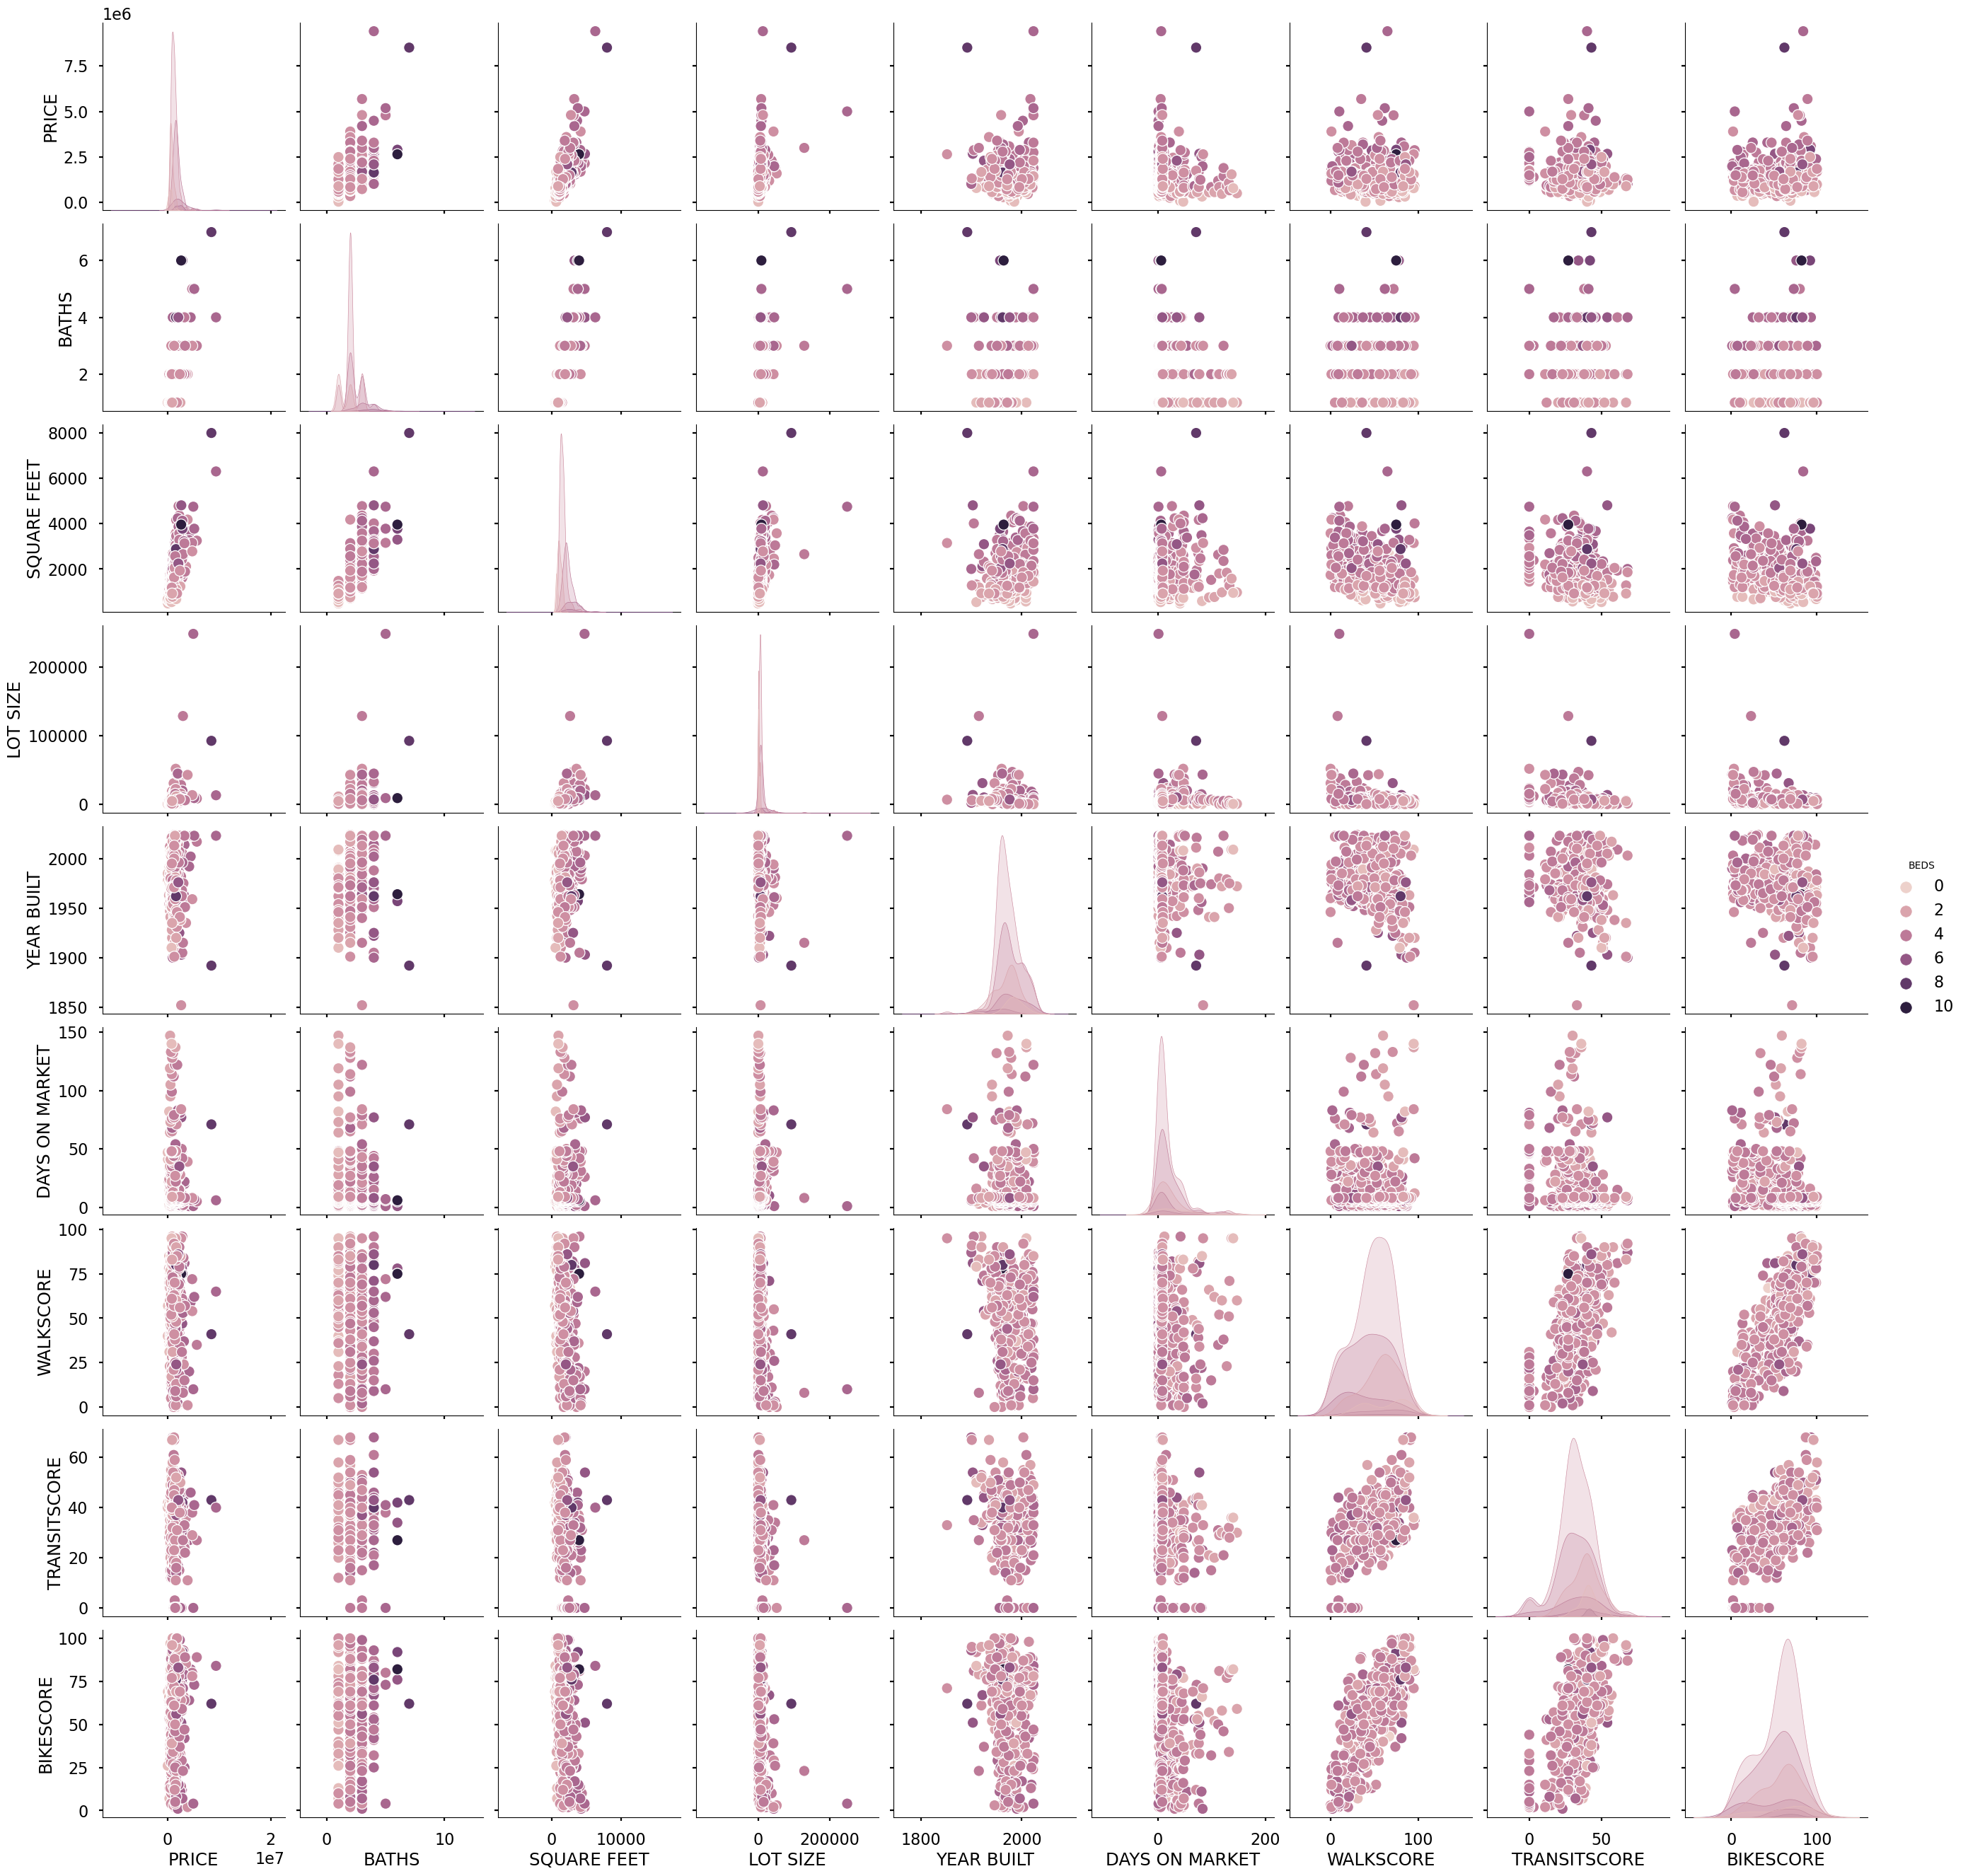

In [35]:
sns.pairplot(df, hue="BEDS", height=3)

### What features exhibit the strongest correlation with property prices in the San Francisco Bay Area?

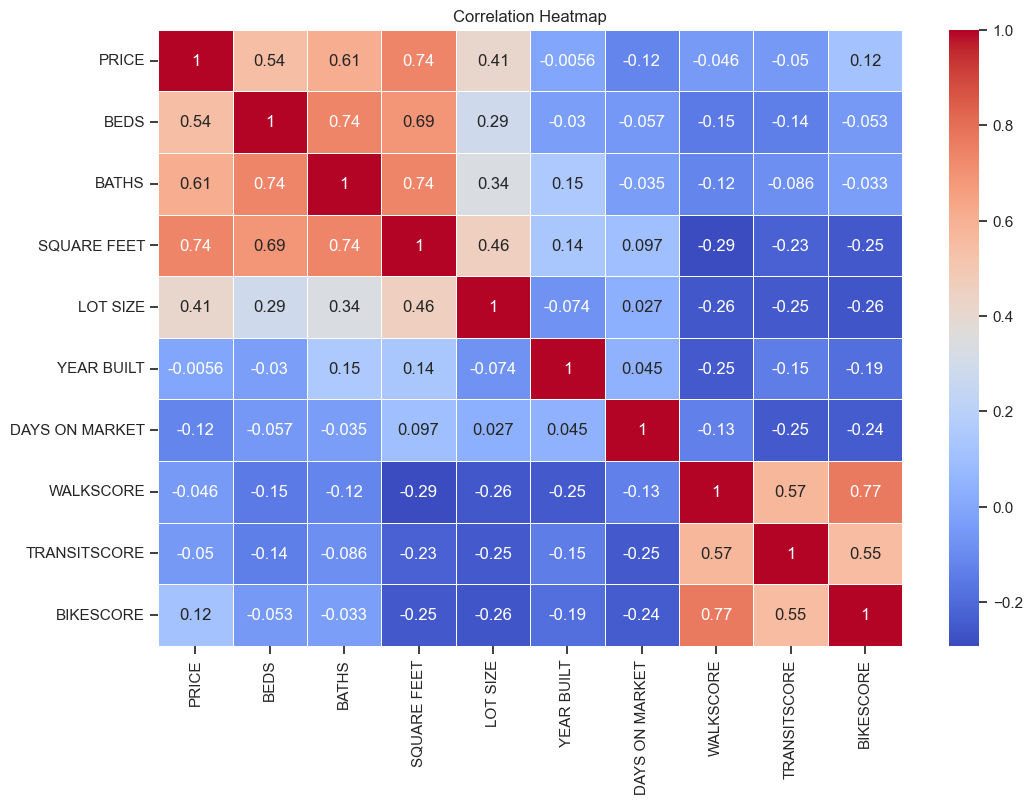

In [154]:
# Calculate the correlation matrix
correlation_matrix = df[['PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'WALKSCORE', 'TRANSITSCORE', 'BIKESCORE']].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


The heatmap displays the strength and direction of correlations between various features and property prices.  
Features with high positive correlations may have a more substantial impact on property prices.


In [155]:
df.columns

Index(['SALE TYPE', 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'LOCATION',
       'SQUARE FEET', 'LOT SIZE', 'YEAR BUILT', 'DAYS ON MARKET', 'WALKSCORE',
       'TRANSITSCORE', 'BIKESCORE'],
      dtype='object')

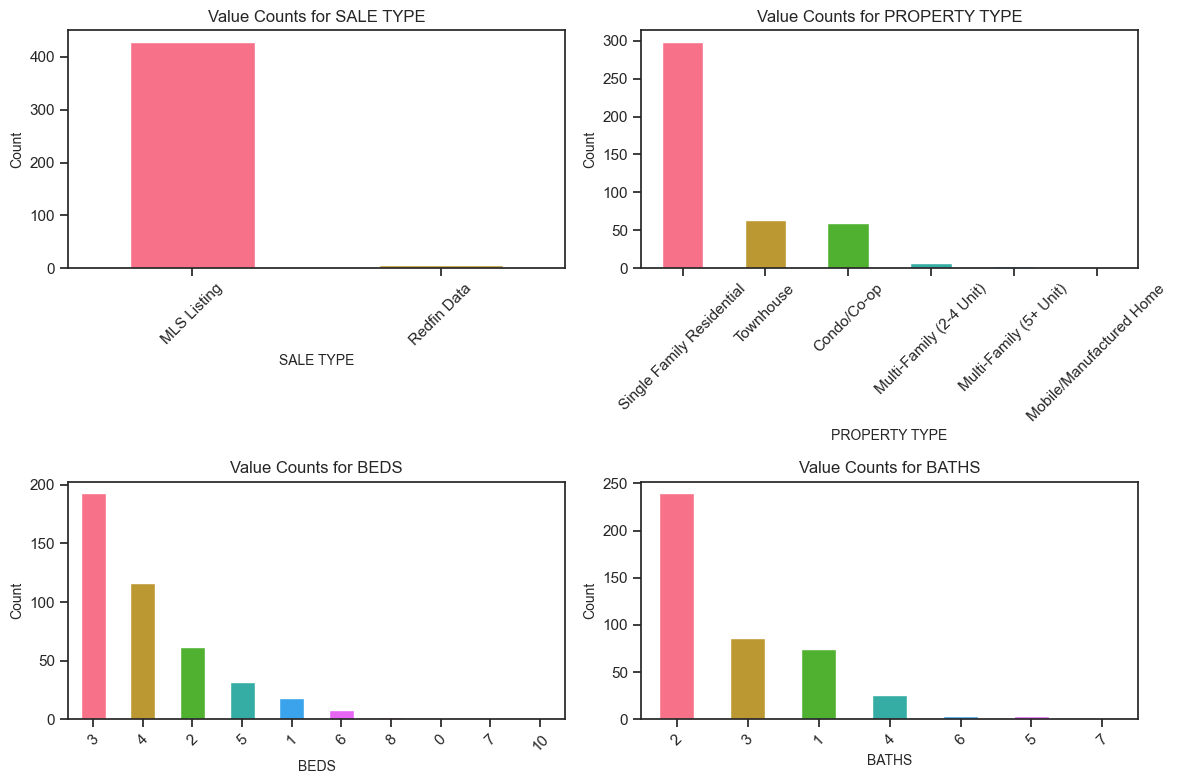

In [156]:

custom_palette = sns.color_palette("husl")

# list of selected column names
selected_columns = ['SALE TYPE', 'PROPERTY TYPE', 'BEDS', 'BATHS']

# Set the figure size
plt.figure(figsize=(12, 8))

# Create subplots for each selected feature
for i, col in enumerate(selected_columns):
    plt.subplot(2, 2, i + 1)
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar', color=custom_palette)
    plt.title(f'Value Counts for {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Count', fontsize=10)
    plt.xticks(rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()


In [158]:
numerical_df = df.select_dtypes(include=['number'])

y = numerical_df[['PRICE']]
x = numerical_df.drop('PRICE', axis=1)

In [160]:
linearregression =  LinearRegression()

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
linearregression.fit(X_train,y_train)
y_pred = linearregression.predict(X_test)

In [161]:
r2 = metrics.r2_score(y_test, y_pred)
r2

0.5486424743572644

In [162]:
X_train,X_test,y_train,y_test=train_test_split(x['SQUARE FEET'].values.reshape(-1, 1),y,test_size=0.2,random_state=0)
linearregression.fit(X_train,y_train)
y_pred = linearregression.predict(X_test)

### How does the size (square footage) of a property affect its price in the San Francisco Bay Area?


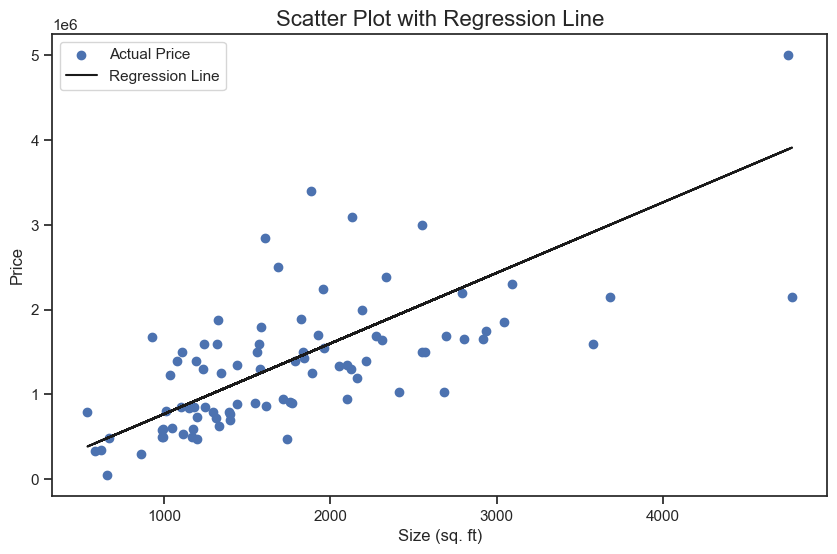

In [166]:
# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))

# Scatter plot of actual data
plt.scatter(X_test, y_test, color='b', label='Actual Price')

# Regression line
plt.plot(X_test, y_pred, color='k', label='Regression Line')

# Labels and title
plt.xlabel('Size (sq. ft)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Scatter Plot with Regression Line', fontsize=16)

# Legend
plt.legend(loc='best')

# Show the plot
plt.show()


The regression analysis revealed that there is a statistically significant relationship between property size and price.  
For every increase in square footage, property prices tend to increase by a certain amount.


In [167]:
r2 = metrics.r2_score(y_test,y_pred)
r2

0.38459795957931564

### Can we classify the number of bedrooms in properties based on price and size?


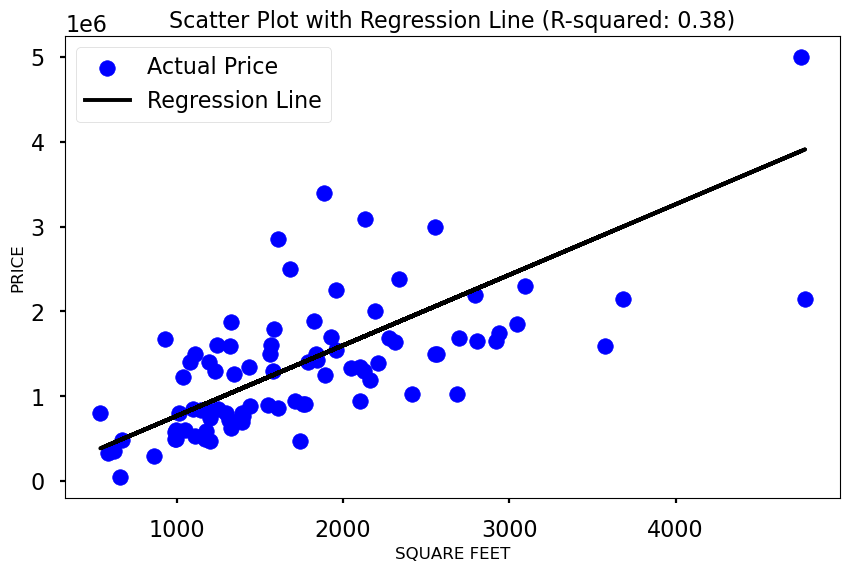

In [62]:
# Create pipeline steps
steps = [("scaler", StandardScaler()),
         ("regression", LinearRegression())]

X = np.array(df['SQUARE FEET']).reshape(-1, 1)
y = np.array(df['PRICE']).reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline = Pipeline(steps)
pipeline.fit(X_train, y_train)

r2_score = pipeline.score(X_test, y_test)

# predict
y_pred = pipeline.predict(X_test)

# scatter plot with a regression line
plt.figure(figsize=(10, 6))


plt.scatter(X_test, y_test, color='b', label='Actual Price')

# Regression line
plt.plot(X_test, y_pred, color='k', label='Regression Line')

# Labels and title
plt.xlabel('SQUARE FEET', fontsize=12)
plt.ylabel('PRICE', fontsize=12)
plt.title(f'Scatter Plot with Regression Line (R-squared: {r2_score:.2f})', fontsize=16)
plt.legend(loc='best')

# Show the plot
plt.show()


In [63]:
r2 = metrics.r2_score(y_test, y_pred)
print("score:", pipeline.score(X_test, y_test))

print('R^2:', r2)
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

score: 0.38459795957931586
R^2: 0.38459795957931586
MAE: 469436.80137777416
MSE: 371454183674.1105
RMSE: 609470.4124681612


In [67]:
# with scaling
X = df[['PRICE', 'SQUARE FEET', 'BATHS']] # Features
y = df['BEDS'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
y.value_counts()

3     193
4     116
2      62
5      32
1      18
6       8
8       2
0       1
7       1
10      1
Name: BEDS, dtype: int64

In [171]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
svc = SVC(C=1.0, random_state=1, kernel='linear')
 
# Fit the model
svc.fit(X_train_std, y_train)
# Make the predictions
y_predict = svc.predict(X_test_std)
 
# Measure the performance
print("Accuracy score %.3f" %metrics.accuracy_score(y_test, y_predict))

Accuracy score 0.606


In [81]:
X = df[['SQUARE FEET']] # Features
y = df['BEDS'] # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)
y.value_counts()
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
max = 0 
k = 0 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

for i in range(1,35):

    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=i)

    #Train the model using the training sets
    knn.fit(X_train, y_train)

    #Predict the response for test dataset
    y_pred = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    if max < acc:
        k = i
        max = acc
    

print(f"Accuracy = {acc*100:.2f}%, K = {k}")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Accuracy = 63.30%, K = 22


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

The KNN model demonstrated a high accuracy score in classifying properties into their respective bedroom categories.  
This suggests that property size and price can effectively predict the number of bedrooms.


In [179]:
walkscore_stats = df['WALKSCORE'].describe()
bikescore_stats = df['BIKESCORE'].describe()
transitscore_stats = df['TRANSITSCORE'].describe()


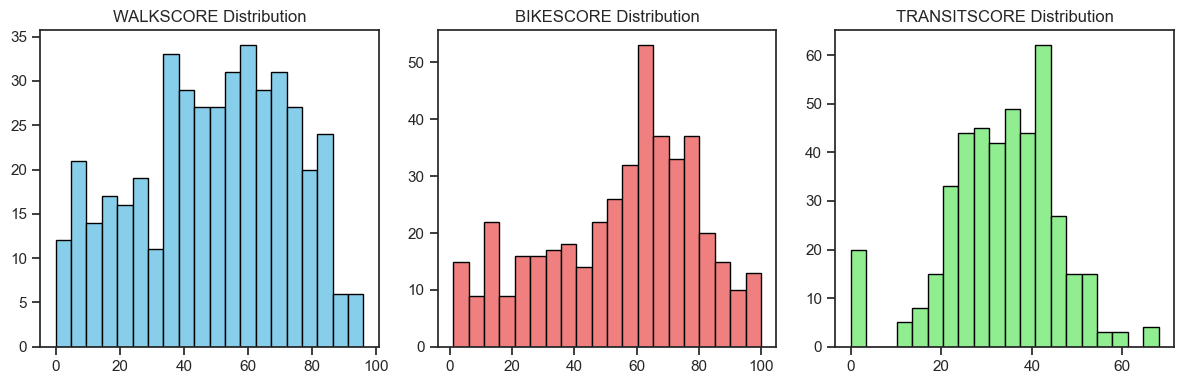

In [180]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.hist(df['WALKSCORE'], bins=20, color='skyblue', edgecolor='black')
plt.title('WALKSCORE Distribution')

plt.subplot(132)
plt.hist(df['BIKESCORE'], bins=20, color='lightcoral', edgecolor='black')
plt.title('BIKESCORE Distribution')

plt.subplot(133)
plt.hist(df['TRANSITSCORE'], bins=20, color='lightgreen', edgecolor='black')
plt.title('TRANSITSCORE Distribution')

plt.tight_layout()
plt.show()


 Each histogram represents the frequency or count of scores within specific intervals (bins). They provide a visual overview of how scores are distributed and whether they exhibit any notable patterns, such as normal distributions or skewness.

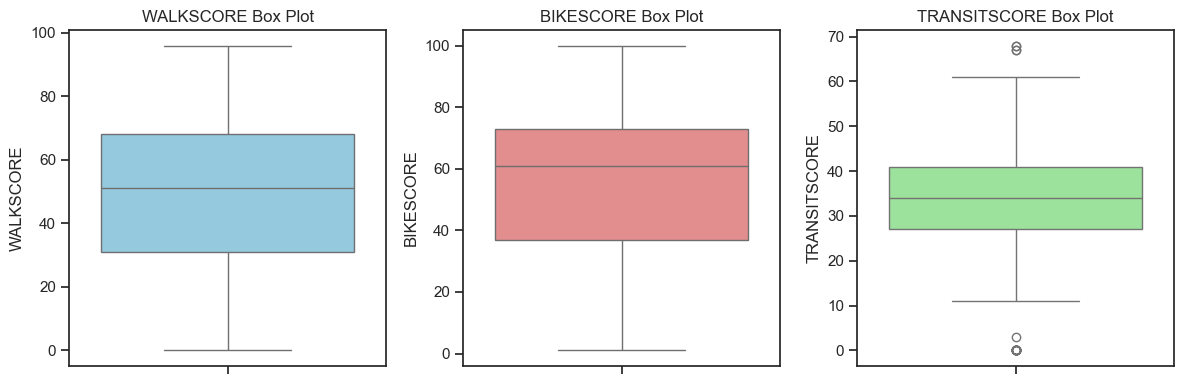

In [181]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.boxplot(y='WALKSCORE', data=df, color='skyblue')
plt.title('WALKSCORE Box Plot')

plt.subplot(132)
sns.boxplot(y='BIKESCORE', data=df, color='lightcoral')
plt.title('BIKESCORE Box Plot')

plt.subplot(133)
sns.boxplot(y='TRANSITSCORE', data=df, color='lightgreen')
plt.title('TRANSITSCORE Box Plot')

plt.tight_layout()
plt.show()


Box plots provide a concise way to visualize the distribution of scores, identify outliers (data points far from the median), and compare distributions across different scores. Each box plot displays the median, quartiles, and potential outliers. They help you understand the central tendency and spread of the data.